## Example calls of environment_mod routines

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
import const
import PyGCPM
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/../")
sys.path.append(fpath)

### 1. environment_mod.Bmag_dipole

Routine to calculate the geomagnetic dipole field strength

We assume a centered dipole model for the Earth’s magnetic field. The components of B can be written as [Walt,1994]:
$$B_r=-2B_0 \frac{R_e^3}{r^3}sin \lambda  $$
$$ B_{\lambda}=B_0\frac{R_e^3}{r^3}cos \lambda  $$
$$B_{\theta}=0$$
and:
$$B=\sqrt{B_r^2+B_{\lambda}^2}=B_0\frac{R_e^3}{r^3} \sqrt{1+3sin^2\lambda}$$
where $r$ and $\lambda$ are the geocentric radial distance and latitude respectively, $R_e$ is the
Earth’s radius (∼ 6370 km), and $B_0$ is the mean value of the field on the equator at
the Earth’s surface ∼ $3.12 × 10^{−5} T$. The geomagnetic field described in this way is
a good approximation to the real field, since our region of interest $(L \approx  2−5)$ is far
enough away from the Earth’s surface for the rapidly decaying higher order terms
to become insignificant, and yet sufficiently close to remain unaltered by solar wind
deformation, and other external current systems (e.g., the ring current, magnetopause
current).In a centered dipole magnetic field model, the path along a given L shell can be described as:
$$r=R_e L\cos^2 \lambda$$
subsituting in the expression for the magnetic field intensity, we get:
$$ B=B_0\frac{R_e^3}{(R_e L\cos^2 \lambda)^3} \sqrt{1+3sin^2\lambda}=B_0 \frac{1}{L^3} \frac{\sqrt{1+3sin^2\lambda}}{\cos^6 \lambda}$$

**Inputs**:

L_arg: L shell

lamda_arg: geomagnetic latitude in rad

**Outputs**:

Geomagnetic field in T

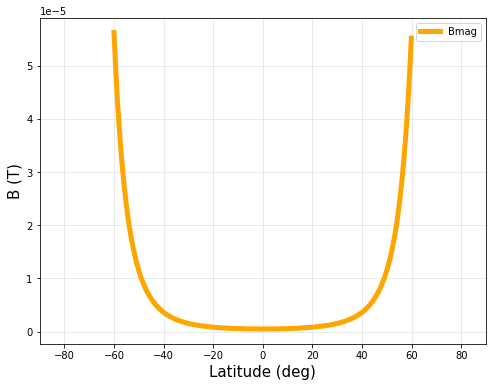

In [2]:
from environment_mod import Bmag_dipole

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

Bmag=Bmag_dipole(L_shell,lats_rad)

#####Plot######
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=15
ax.plot(lats_deg,Bmag,c='orange',label='Bmag',linewidth=s)

ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()


plt.show()


### 2. environment_mod.carpender_anderson

[Carpenter, D. L., and R. R. Anderson. "An ISEE/whistler model of equatorial electron density in the magnetosphere." Journal of Geophysical Research: Space Physics 97.A2 (1992): 1097-1108.]

a. Plasmapause inner limit $L_{ppi}$:
$$L_{ppi}=5.6-0.46Kp_{max}$$

where $Kp_{max}$ is the maximum Kp value in the preceding 24 hours.
b. The saturated plasmasphere segment for $2.25 \leq L \leq L_{ppi} $:

$$ log_{ne}=(-0.3145L+3.9043)+[0.15(cos\frac{2\pi(d+9)}{365}-0.5 cos\frac{4\pi(d+9)}{365})+0.00127 \bar{R} -0.0635] e^{-\frac{L-2}{1.5}}$$

c. The plasmapause segment for $L_{ppi} \leq L \leq L_{ppo}$:

\begin{equation}
  ne=\begin{cases}
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1}}& 00\leq t < 06 MLT \\
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1+0.011(t-6)}}& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}


d. The extended plasma trough for $2.25 \leq L \leq 8$:
\begin{equation}
  ne=\begin{cases}
   (5800+300t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 00\leq t < 06 MLT \\
    (-800+1400t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}

e. The plasmapuse outer limit $L_{ppo}$, determined by solving simultaneously for the plasmapause segment and the extended plasma trough.

f. The plasma trough segment for $L_{ppo} \leq L \leq 8$:
$$ne=ne(L_{ppo})(\frac{L}{L_{ppo}})^{-4.5}+(1-e^{-\frac{L-2}{10}})$$


**Inputs**:

Lsh: L shell

Kpmax: the maximum Kp value in the preceding 24 hours

day: the day number

mlt: the magnetic local time

Rb: the 13-month average sunspot number

**Outputs**:

ne_eq: equatorial electron density


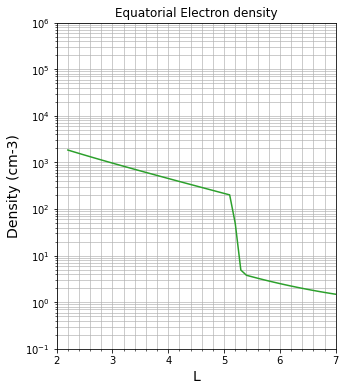

In [3]:
from environment_mod import carpender_anderson

Lshell=np.arange(2.2,8,0.1)
Kpmax=1
day=0
mlt=2
Rsun=90

ne_final=[]

for i in range(0,len(Lshell)):
    ne_tmp=carpender_anderson(Lshell[i],Kpmax,day,mlt,Rsun)
#     print(ne_tmp)
    ne_final.append(ne_tmp)


###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Equatorial Electron density')
ax.set_xlabel("L",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(Lshell,ne_final,color="tab:green")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_ylim([10**(-1), 10**6])
ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################

### 3. environment.densities_denton
Routine to calculate the electron density along a magnetic field line after [Denton et al., 2002]

$$n_e=n_{eq}\cos^{-4}\lambda$$



**Inputs**:

ne0_arg: electron number density

lamda_arg: geomagnetic latitude in rad



**Outputs**:

n_e_tmp: electron number density


*Denton, R. E., J. Goldstein, and J. D. Menietti (2002), Field line depen-
dence of magnetospheric electron density, Geophys. Res. Lett., 29(24),
2205, doi:10.1029/2002GL015963.

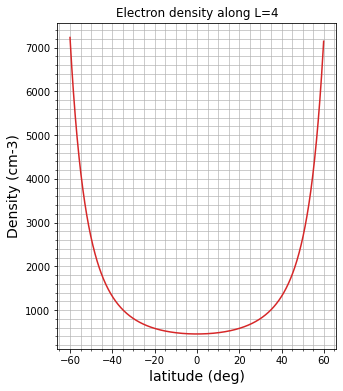

In [4]:
from environment_mod import densities_denton

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4
Kpmax=1
day=0
mlt=2
Rsun=90
ne_eq_L4=carpender_anderson(L_shell,Kpmax,day,mlt,Rsun)
ne_L4=[]

for i in range(0,len(lats_rad)):
    netmp=densities_denton(ne_eq_L4,lats_rad[i])
    ne_L4.append(netmp)
    
###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Electron density along L=4')
ax.set_xlabel("latitude (deg)",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(lats_deg,ne_L4,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################    

### 4. environment.densities_ozhogin
Routine to calculate the electron density along a magnetic field line after [Ozhogin et al., 2012]

$$n_{eq}(L)=10^{4.4693-0.1903*L}$$

$$n_e(L,\lambda)=n_{eq}(L) \cos^{-0.75} \Big(\frac{\pi}{2}\frac{\lambda}{\lambda_{inv}}\Big)$$

$$\lambda_{inv}=arccos\sqrt{\frac{1}{L}}$$

**Inputs**:

L_arg: Lshell

lamda_arg: geomagnetic latitude in rad



**Outputs**:

neqtmp: equatorial electron number density

n_lamtmp: electron number density at latitude


*Ozhogin, P., et al. "Field‐aligned distribution of the plasmaspheric electron density: An empirical model derived from the IMAGE RPI measurements." Journal of Geophysical Research: Space Physics 117.A6 (2012).

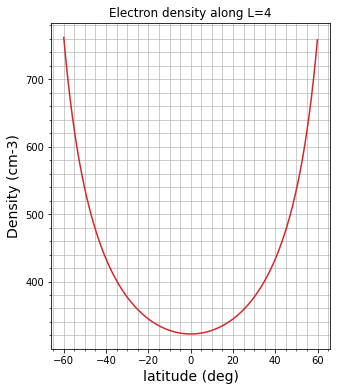

In [5]:
from environment_mod import densities_ozhogin

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

ne_L4_ozh=[]
ne_eq_L4_ozh=[]
for i in range(0,len(lats_rad)):
    netmp=densities_ozhogin(L_shell,lats_rad[i])
    ne_L4_ozh.append(netmp[1])
    ne_eq_L4_ozh.append(netmp[0])
###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Electron density along L=4')
ax.set_xlabel("latitude (deg)",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(lats_deg,ne_L4_ozh,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################    



### 5. environment_mod.cyclotron


Routine to calculate the gyrofrequency of a particle
$$\Omega_{s}=\frac{q_s B}{m_s}$$

**Inputs**:

B_arg: Geomagnetic field strength in T

q_arg: particle charge in Cb

m_arg: particle mass in kg

**Outputs**:

omega_tmp: particle gyrofrequency in rad/s

fc_tmp: particle gyrofrequency in Hz


### 6. environment_mod.omega_plasma


Routine to calculate the plasma frequency
$$\omega_{ps}=\frac{N_{s}q_{s}^2}{\epsilon_{0}m_{s}}$$

**Inputs**:

n_arg: particle number density in $m^{-3}$

q_arg: particle charge in Cb

m_arg: particle mass in kg

**Outputs**:

omegap_tmp: plasma frequency in rad/s

fp_tmp: plasma frequency in Hz

### 7. environment_mod.omega_upper_hybrid

Routine to calculate the upper hybrid resonance frequency

$$\omega_{uh}=\frac{\omega_{ce}^2+\omega_{pe}^2+\omega_{ci}^2+\omega_{pi}^2}{2}+\frac{1}{2}\Bigg[ (\omega_{ce}^2+\omega_{pe}^2-\omega_{ci}^2-\omega_{pi}^2)^2 +4\omega_{pe}^2\omega_{pi}^2 \Bigg]$$

**Inputs**:
wce_arg: electron gyrofrequency 

wpe_arg: electron plasma frequency 

wci_arg: ion gyrofrequency 

wpi_arg: ion plasma frequency 

**Outputs**:

wuh_tmp: upper hybrid resonance frequency


### 8. environment_mod.omega_lower_hybrid

Routine to calculate the lower hybrid resonance frequency

$$\omega_{uh}=\frac{\omega_{ce}^2+\omega_{pe}^2+\omega_{ci}^2+\omega_{pi}^2}{2}-\frac{1}{2}\Bigg[ (\omega_{ce}^2+\omega_{pe}^2-\omega_{ci}^2-\omega_{pi}^2)^2 +4\omega_{pe}^2\omega_{pi}^2 \Bigg]$$

or for full ion distribution [**environment_mod.f_lower_hybrid**]


$$f_{lh}^2=\frac{1}{M_{eff}}\frac{f_{ce}^2f_{pe}^2}{f_{ce}^2+f_{pe}^2}$$

$$\frac{1}{M_{eff}}=\frac{m_e}{n_e} \sum_{ions} \frac{n_i}{m_i}$$

or simplified [**environment_mod.omega_lower_hybrid_v2**]

$$\frac{1}{\omega_{lh}^2}=\frac{1}{\omega_{ce}\omega_{ci}}+\frac{1}{\omega_{pi}^2}$$

**Inputs**:
wce_arg: electron gyrofrequency 

wpe_arg: electron plasma frequency 

wci_arg: ion gyrofrequency 

wpi_arg: ion plasma frequency 

**Outputs**:

wuh_tmp: lower hybrid resonance frequency


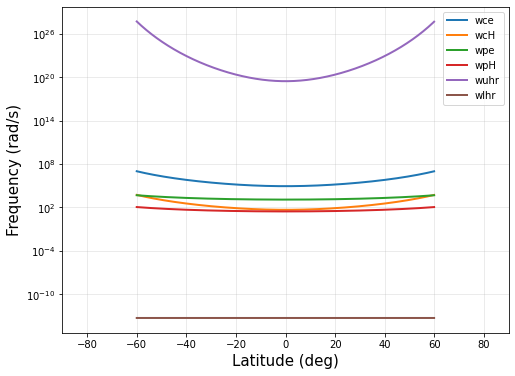

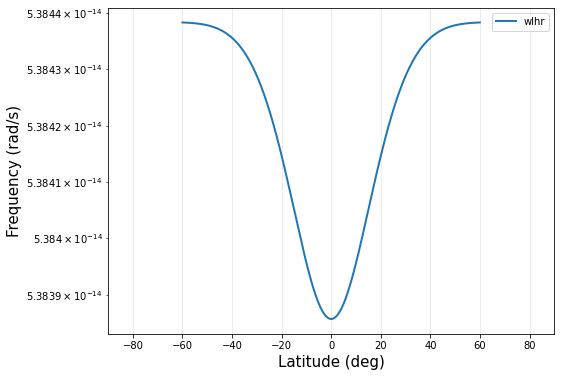

In [6]:
from environment_mod import cyclotron, f_lower_hybrid,omega_lower_hybrid,omega_lower_hybrid_v2,omega_upper_hybrid, omega_plasma

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

Bmag=Bmag_dipole(L_shell,lats_rad)


wce=cyclotron(Bmag,const.qe,const.me)[0]
wcH=cyclotron(Bmag,const.qi,const.mH)[0]
ne0=ne_eq_L4
ne=densities_denton(ne0,lats_rad)
wpe=omega_plasma(ne,const.qe,const.me)[0]
wpH=omega_plasma(ne,const.qi,const.mH)[0]

wuhr=omega_upper_hybrid(wce,wpe,wcH,wpH)
wlhr=omega_lower_hybrid(wce,wpe,wcH,wpH)

fcetmp=wce/(2*np.pi)
fpetmp=wpe/(2*np.pi)

flhr=f_lower_hybrid(fcetmp,fpetmp,ne,ne,0,0)  #assuming electron-ghydrogen ion plasma
wlhr2=2*np.pi*flhr


wlhr3=omega_lower_hybrid_v2(wce,wpe,wcH,wpH)
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lats_deg,wce,label='wce',linewidth=s)
ax.plot(lats_deg,wcH,label='wcH',linewidth=s)
ax.plot(lats_deg,wpe,label='wpe',linewidth=s)
ax.plot(lats_deg,wpH,label='wpH',linewidth=s)
ax.plot(lats_deg,wuhr,label='wuhr',linewidth=s)
ax.plot(lats_deg,wlhr2,label='wlhr',linewidth=s)
ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Frequency (rad/s)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,wlhr2,label='wlhr',linewidth=s)
ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Frequency (rad/s)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

### 9. environment_mod.aeq2alpha


Routine to translate equatorial pitch angle to local pitch angle

A charged particle moving in the Earth’s magnetic field (in the absence of the wave
field) experiences three different types of periodic motion [Walt, 1994, p.36] occurring
on three different timescales: rapid gyration about the static magnetic field line
(∼ $10^{−4}$ sec), bounce motion along the magnetic field line between northern and
southern hemispheres (∼ $1$ sec), and a longitudinal drift about the Earth (∼ $10^3$ sec). 
Associated with each of these periodic movements are adiabatic invariants, which
play the role of ‘constants of motion’ and are obtained using the Hamilton-Jacobi theory [Goldstein et al., 2002, p.430] by integrating the canonical momentum around
the orbit path as follows:
$$ J_n =  \oint [m_s \vec{u}+q_s \vec{A}] \cdot d \vec{l}$$
where $d\vec{l}$ is an element of the particle path around the orbit, and $m_s$ , $q_s$ , and $\vec{v}$ are
the mass, charge and velocity of a particle of species s respectively. We focus on the
first adiabatic invariant since it occurs on the time
scales of the wave-particle interaction. Thus the quantity conserved along the
electron’s helical trajectory is:
$$J_1=M=\frac{p_{\perp}^2}{2m_{s0}B} \propto \frac{\sin^2 \alpha}{B} $$
which is referred to as the first adiabatic invariant or magnetic moment , where $p_{\perp}$ is the perpendicular component of the electron momentum, $m_{s0}$ is
the particle rest mass, $B_0$ is the magnetic field intensity, and $\alpha$ is the electron pitch
defined as $\alpha=\tan^{-1}(u_{\perp}/u_z)$. The velocity components parallel ($u_z$) and perpendicular ($u_{\perp}$) to the magnetic field can be specified using as:
$$u_z(\lambda)=u\cos \alpha (\lambda)$$
$$u_{\perp}(\lambda)=u\sin \alpha (\lambda)$$

$$ \sin^2 \alpha (\lambda) = \frac{B(\lambda)}{B_{eq}} \sin^2 \alpha_{eq} $$

**Inputs**:

L_arg: L shell

lambda_arg: magnetic latitude in rad

aeq_arg: equatorial pitch angle in rad
**Outputs**:

alpha0: local pitch angle in rad

In [7]:
from environment_mod import aeq2alpha

lat_deg = 10
lat_rad = np.deg2rad(lat_deg)
L_shell=4
aeq_deg=30
aeq_rad=np.deg2rad(aeq_deg)

alpha_local=aeq2alpha(L_shell,lat_rad,aeq_rad)
print('latitude:',lat_deg, 'deg')
print('L_shell:',L_shell)
print('equatorial pitch angle:',aeq_deg, 'deg')
print('local pitch angle:',np.rad2deg(alpha_local), 'deg')

5.580472197976097e-07
4.875e-07
latitude: 10 deg
L_shell: 4
equatorial pitch angle: 30 deg
local pitch angle: 32.34093633311206 deg


### 10. environment_mod.alpha2aeq


Routine to translate local pitch angle to equatorial pitch angle

A charged particle moving in the Earth’s magnetic field (in the absence of the wave
field) experiences three different types of periodic motion [Walt, 1994, p.36] occurring
on three different timescales: rapid gyration about the static magnetic field line
(∼ $10^{−4}$ sec), bounce motion along the magnetic field line between northern and
southern hemispheres (∼ $1$ sec), and a longitudinal drift about the Earth (∼ $10^3$ sec). 
Associated with each of these periodic movements are adiabatic invariants, which
play the role of ‘constants of motion’ and are obtained using the Hamilton-Jacobi theory [Goldstein et al., 2002, p.430] by integrating the canonical momentum around
the orbit path as follows:
$$ J_n =  \oint [m_s \vec{u}+q_s \vec{A}] \cdot d \vec{l}$$
where $d\vec{l}$ is an element of the particle path around the orbit, and $m_s$ , $q_s$ , and $\vec{v}$ are
the mass, charge and velocity of a particle of species s respectively. We focus on the
first adiabatic invariant since it occurs on the time
scales of the wave-particle interaction. Thus the quantity conserved along the
electron’s helical trajectory is:
$$J_1=M=\frac{p_{\perp}^2}{2m_{s0}B} \propto \frac{\sin^2 \alpha}{B} $$
which is referred to as the first adiabatic invariant or magnetic moment , where $p_{\perp}$ is the perpendicular component of the electron momentum, $m_{s0}$ is
the particle rest mass, $B_0$ is the magnetic field intensity, and $\alpha$ is the electron pitch
defined as $\alpha=\tan^{-1}(u_{\perp}/u_z)$. The velocity components parallel ($u_z$) and perpendicular ($u_{\perp}$) to the magnetic field can be specified using as:
$$u_z(\lambda)=u\cos \alpha (\lambda)$$
$$u_{\perp}(\lambda)=u\sin \alpha (\lambda)$$

$$ \sin^2 \alpha (\lambda) = \frac{B(\lambda)}{B_{eq}} \sin^2 \alpha_{eq} $$

**Inputs**:

L_arg: L shell

lambda_arg: magnetic latitude in rad

alpha_arg: equatorial pitch angle in rad
**Outputs**:

alphaeq0: local pitch angle in rad

In [12]:
from environment_mod import alpha2aeq

lat_deg = 10
lat_rad = np.deg2rad(lat_deg)
L_shell=4
alpha_deg=30
alpha_rad=np.deg2rad(alpha_deg)

aeq_local=alpha2aeq(L_shell,lat_rad,alpha_rad)
print('latitude:',lat_deg, 'deg')
print('L_shell:',L_shell)
print('local pitch angle:',alpha_deg, 'deg')
print('equatorial pitch angle:',np.rad2deg(aeq_local), 'deg')


latitude: 10 deg
L_shell: 4
local pitch angle: 30 deg
equatorial pitch angle: 27.860993160631715 deg


### Pitch angle mapping

16.330085932197345
8.408538076942063
5.341843503512351
3.7766995492044364
2.8513992365999554
2.2510068089138744
1.8354177581404638


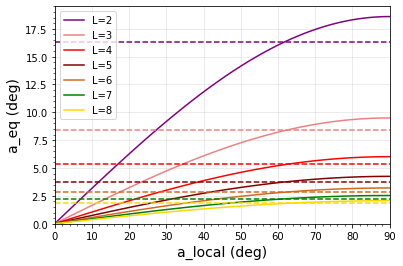

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Polygon
import matplotlib.colors as colors
from matplotlib import ticker, cm


H=500 #satellite altitude in km
Re=6370 #Earth radius in Re
B0=3.12*10**(-5)
Rsat=H+Re
r=Rsat
# Beq=B0*((Re/r)**3)

L=[2,3,4,5,6,7,8]
lam_rad=[]
lam_deg=[]
B_ratio=[]
a_eq_L2=[]
a_eq_L3=[]
a_eq_L4=[]
a_eq_L5=[]
a_eq_L6=[]
a_eq_L7=[]
a_eq_L8=[]
alc=[]
Beq=[]

for i in range(0,len(L)):
    cos_lam=np.sqrt(r/(Re*L[i]))
    lam_tmp=np.arccos(cos_lam)
    lam_deg_tmp=np.rad2deg(lam_tmp)
    lam_rad.append(lam_tmp)
    lam_deg.append(lam_deg_tmp)

    Beq_tmp=B0*((1/L[i])**3)
    Beq.append(Beq_tmp)

for i in range(0,len(L)):
    fac1=4*(L[i]**6)-3*(L[i]**5)
    fac1=np.sqrt(fac1)
    fac1=1/fac1
    sinalc=np.sqrt(fac1)
    alc_tmp=np.arcsin(sinalc)
    alc_deg=np.rad2deg(alc_tmp)
    alc.append(alc_deg)
    print(alc_deg)


# print(lam_rad)

for k in range(0,len(lam_rad)):
    sin_lam=np.sin(lam_rad[k])
    sin_sq=sin_lam**2
    clat=np.sin(lam_rad[k])
    sqrt=np.sqrt(1+3*sin_sq)
    B_lam=B0*((Re/r)**3)*sqrt
    
    B_ratio_tmp=Beq[k]/B_lam
    B_ratio.append(B_ratio_tmp)

a_local=np.arange(0,91,1)
a_local_rad=np.deg2rad(a_local)

#L=2
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[0]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L2.append(aeq_deg)
    # print(np.rad2deg(a_local_rad[l]),aeq_deg)

#L=3
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[1]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L3.append(aeq_deg)
    # print(np.rad2deg(a_local_rad[l]),aeq_deg)

#L=4
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[2]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L4.append(aeq_deg)

#L=5
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[3]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L5.append(aeq_deg)

#L=6
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[4]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L6.append(aeq_deg)

#L=7
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[5]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L7.append(aeq_deg)

#L=7=8
for l in range(0,len(a_local_rad)):
    sin_sq_aeq=B_ratio[6]*np.sin(a_local_rad[l])*np.sin(a_local_rad[l])
    sin_aeq=np.sqrt(sin_sq_aeq)
    aeq=np.arcsin(sin_aeq)
    aeq_deg=np.rad2deg(aeq)
    a_eq_L8.append(aeq_deg)
    
fig, ax = plt.subplots()
s=5


ax.set_xlabel("a_local (deg)",fontsize=14)
ax.set_ylabel("a_eq (deg)",fontsize=14)

ax.plot(a_local,a_eq_L2,color="purple", label='L=2')
ax.plot(a_local,a_eq_L3,color="lightcoral", label='L=3')
ax.plot(a_local,a_eq_L4,color="red", label='L=4')
ax.plot(a_local,a_eq_L5,color="maroon", label='L=5')
ax.plot(a_local,a_eq_L6,color="chocolate", label='L=6')
ax.plot(a_local,a_eq_L7,color="green", label='L=7')
ax.plot(a_local,a_eq_L8,color="gold", label='L=8')

ax.axhline(y=alc[0], color='purple', linestyle='--')
ax.axhline(y=alc[1], color='lightcoral', linestyle='--')
ax.axhline(y=alc[2], color='red', linestyle='--')
ax.axhline(y=alc[3], color='maroon', linestyle='--')
ax.axhline(y=alc[4], color='chocolate', linestyle='--')
ax.axhline(y=alc[5], color='green', linestyle='--')
ax.axhline(y=alc[6], color='gold', linestyle='--')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.grid(alpha=.3)
ax.set_xlim(0,90)
ax.set_ylim(0,None)
ax.legend()
# ax.set_xlabel('time (sec)')
# ax.set_ylabel('$\mu$ ')
# ax2.set_ylabel("Latitude [deg]",color=tableau20[2],fontsize=14)
plt.show()

### 11. environment_mod.dwc_ds


Routine to calculate the first derivative of gyrofrequency with respect to the distance along the magnetic field line

$$ds=L R_e (1+ 3 \sin^2 \lambda)^{1/2} \cos \lambda d \lambda \tag{1} $$ [Tao et al, 2012].

$$ \omega_H = \frac {q_e B}{m_e} = \frac {q_e B_0}{m_e} \frac{1}{L^3} \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda}= \xi \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda} \tag{2} $$


$$\frac{\partial \omega_H}{\partial s}= \frac{\partial \omega_H}{\partial \lambda} \frac{\partial \lambda}{\partial s}  \tag{3} $$
$$ \frac{\partial \omega_H}{\partial \lambda}= \xi \frac{\partial}{\partial \lambda} \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda} = \xi \frac{\cos^6 \lambda \frac{\partial}{\partial \lambda} \sqrt{1+3\sin^2 \lambda}-\sqrt{1+3\sin^2 \lambda}\frac{\partial}{\partial \lambda}\cos^6 \lambda  }{\cos^{12} \lambda}=$$
$$=\xi \Big[ \frac{\frac{1}{2\sqrt{1+3\sin^2 \lambda}}\frac{\partial}{\partial \lambda}(1+3\sin^2\lambda)}{\cos^6 \lambda} - \frac{\sqrt{1+3\sin^2 \lambda }6 \cos^5 \lambda \frac{\partial}{\partial \lambda} \cos \lambda}{\cos^{12} \lambda} \Big] =$$
$$=\xi \Big[ \frac{6 \sin \lambda \cos \lambda}{2 \cos^6 \lambda \sqrt{1+3\sin^2 \lambda} } - \frac{\sqrt{1+3\sin^2 \lambda} 6 \cos^5 \lambda (-\sin \lambda)}{\cos^{12} \lambda} \Big] =$$
$$=\xi \Big[ \frac{3 \sin \lambda \cos \lambda}{\cos^6 \lambda \sqrt{1+3\sin^2 \lambda}} + \frac{6 \sin \lambda \sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda \cos\lambda} \Big] = $$
$$=3 \xi \frac{\sqrt{1+3\sin^2 \lambda}}{\cos^6 \lambda} \Big[ \frac{\sin \lambda \cos \lambda}{\sqrt{1+3\sin^2 \lambda}^2}+ \frac{2\sin\lambda}{\cos\lambda} \Big] = $$
$$=3 \omega_H \sin \lambda \cos\lambda \Big[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Big] $$
Thus:
$$\frac{\partial \omega_H}{\partial s}= \frac{1}{R_e L \cos \lambda \sqrt{1+3\sin^2 \lambda}} 3 \omega_H \sin \lambda \cos \lambda \Bigg[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Bigg] =$$
$$\frac{\partial \omega_H}{\partial s}=\frac{3 \omega_H}{R_e L} \frac{\sin \lambda}{\sqrt{1+3\sin^2 \lambda}} \Bigg[ \frac{1}{\sqrt{1+3\sin^2 \lambda}^2} + \frac{2}{\cos^2 \lambda} \Bigg] $$

**Inputs**:

wc_arg: gyrofrequency in rad/s

lamda_arg: magnetic latitude in rad

L_arg: L shell

**Outputs**:

dwce_ds_arg: first derivative of gyrofrequency



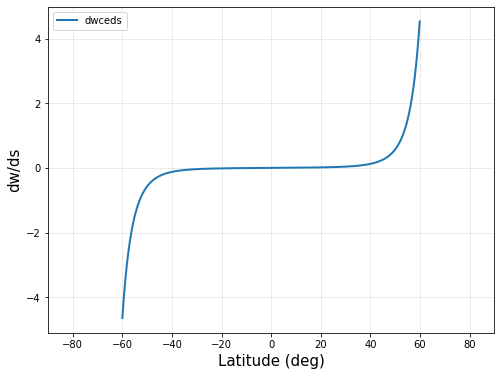

In [20]:
from environment_mod import dwc_ds

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

Bmag=Bmag_dipole(L_shell,lats_rad)
wce=cyclotron(Bmag,const.qe,const.me)[0]

dwceds=dwc_ds(wce,lats_rad,L_shell)

###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15

ax.plot(lats_deg,dwceds,label='dwceds',linewidth=s)
# ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'dw/ds',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()

### 12. environment_mod.magLshell


Routine to calculate the current L shell at position
$$L=\frac{r}{R_e \cos^2\lambda}$$

**Inputs**:

r_arg: geocentric distance in m

lat_arg: magnetic latitude in rad


**Outputs**:

L_tmp: Lshell



In [30]:
from environment_mod import magLshell
rgeo=10000e3
lat_mag=np.deg2rad(10)
Lsh= magLshell(rgeo,lat_mag)

print('geocentric distance', rgeo/1000, 'km')
print('magnetic latitude', np.rad2deg(lat_mag), 'deg')
print('current L shell', Lsh)

geocentric distance 10000.0 km
magnetic latitude 10.0 deg
current L shell 1.6166024720475014


### Example runs of imported packages

### Exapmple run of PyGCPM

PyGCPM is a Python 3 wrapper for the Global Core Plasma Model (Gallagher et al., 2000)

Can be found at https://github.com/mattkjames7/PyGCPM.git

[GALLAGHER, Dennis L.; CRAVEN, Paul D.; COMFORT, Richard H. Global core plasma model. Journal of Geophysical Research: Space Physics, 2000, 105.A8: 18819-18833.]



In [9]:
import PyGCPM
import datetime
from spacepy import coordinates as coord
from spacepy.time import Ticktock

lats_deg = np.arange(-60,60,1)
lats_rad = np.deg2rad(lats_deg)
lons_rad=np.empty(len(lats_rad))
lons_rad.fill(0)
L_shell=4
time0='Sep 21 2008 00:00:30.000'
time_range_sec=np.empty(len(lats_rad))
time_range_sec.fill(0)

utc_tmp = datetime.datetime.strptime(time0, '%b %d %Y %H:%M:%S.%f')

time_range = [utc_tmp + datetime.timedelta(seconds=s) for s in time_range_sec]


rmag=L_shell*const.Re*np.cos(lats_rad)*np.cos(lats_rad) #calculate geocentric distance from latitude and L shell (dipole field)

tmp_coords = coord.Coords(list(zip(rmag, lats_rad, lons_rad)),'MAG','sph',units=['m','rad','rad'])
tmp_coords.ticks = Ticktock(time_range)
tmp_coords_mag_cart=tmp_coords.convert('MAG','car')

posx=tmp_coords_mag_cart.x
posy=tmp_coords_mag_cart.y
posz=tmp_coords_mag_cart.z

tmp_coords_SM_car=tmp_coords_mag_cart.convert('SM','car')

posx_SM=tmp_coords_SM_car.x
posy_SM=tmp_coords_SM_car.y
posz_SM=tmp_coords_SM_car.z

Kp=1
hrs=1
mins=1
secs=30
yearmonthday=20080921

idx=100
print(np.sqrt(posx_SM[idx]*posx_SM[idx]+posy_SM[idx]*posy_SM[idx]+posz_SM[idx]*posz_SM[idx]))
print(np.sqrt(posx[idx]*posx[idx]+posy[idx]*posy[idx]+posz[idx]*posz[idx]))
ne_gcpm=[]
nH_gcpm=[]
nHe_gcpm=[]
nO_gcpm=[]
for i in range(0,len(posx_SM)):
#     print(i)
    ut_temp=hrs+mins/60+secs/3600
    x=posx_SM[i]/const.Re
    y=posx_SM[i]/const.Re
    z=posx_SM[i]/const.Re
    ne_temp,nH_temp,nHe_temp,nO_temp = PyGCPM.GCPM(x,y,z,yearmonthday,ut_temp,Kp=Kp,Verbose=True)
    ne_gcpm.append(ne_temp[0])
    nH_gcpm.append(nH_temp[0])
    nHe_gcpm.append(nHe_temp[0])
    nO_gcpm.append(nO_temp[0])
#     print(z)


14971377.733920038
14971377.733920041


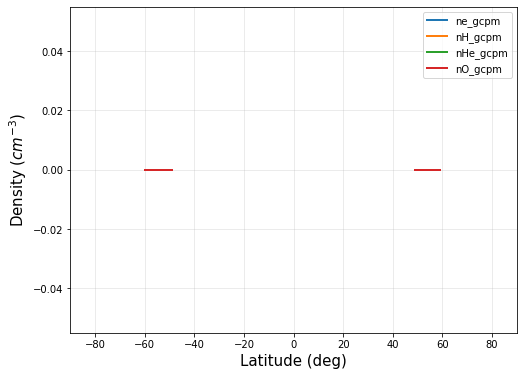

In [10]:
###plot###############################
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lats_deg,ne_gcpm,label='ne_gcpm',linewidth=s)
ax.plot(lats_deg,nH_gcpm,label='nH_gcpm',linewidth=s)
ax.plot(lats_deg,nHe_gcpm,label='nHe_gcpm',linewidth=s)
ax.plot(lats_deg,nO_gcpm,label='nO_gcpm',linewidth=s)

# ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'Density ($cm^{-3}$)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()
